# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

In [1]:
import pandas as pd
import seaborn as sns

### Impact of Starting Grid Position on Final Position

The following graphs display the number of times a racer in a certain grid position attained each possible final position.

In [2]:
results_df = pd.read_csv('F1Data/results.csv')
order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','\\N']

<Axes: xlabel='position', ylabel='count'>

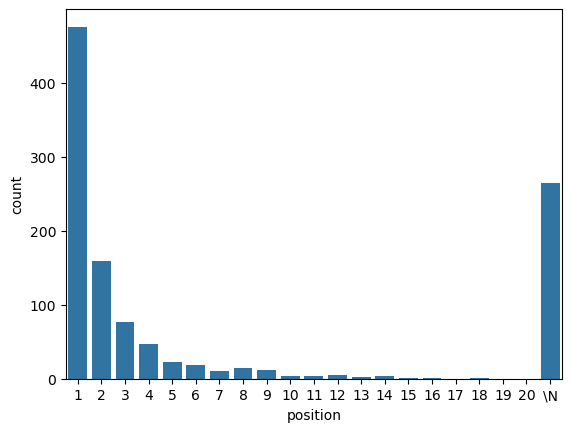

In [3]:
final_position_grid1 = results_df.loc[results_df['grid'] == 1]
sns.countplot(data=final_position_grid1, x='position', order=order)

<Axes: xlabel='year', ylabel='count'>

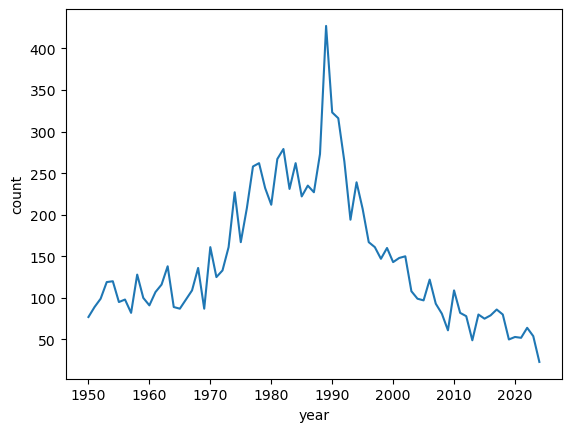

In [17]:
race_df = pd.read_csv('F1Data/races.csv')
merge_df = results_df.merge(race_df, on='raceId')
dnf = merge_df[merge_df['position']=='\\N'][['year', 'position']]
dnf_counts = dnf.groupby('year').size().reset_index(name='count')
sns.lineplot(data=dnf_counts, x='year', y='count')

<Axes: xlabel='position', ylabel='count'>

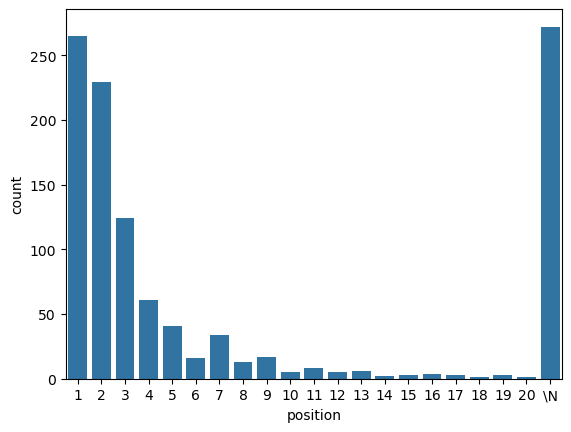

In [34]:
final_position_grid2 = results_df.loc[results_df['grid'] == 2]
sns.countplot(data=final_position_grid2, x='position', order=order)

<Axes: xlabel='position', ylabel='count'>

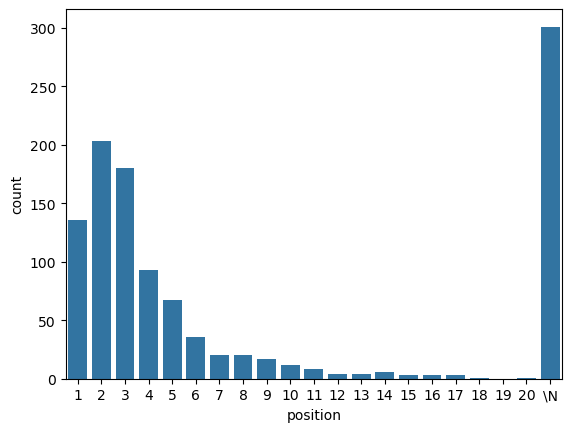

In [35]:
final_position_grid3 = results_df.loc[results_df['grid'] == 3]
sns.countplot(data=final_position_grid3, x='position', order=order)

<Axes: xlabel='position', ylabel='count'>

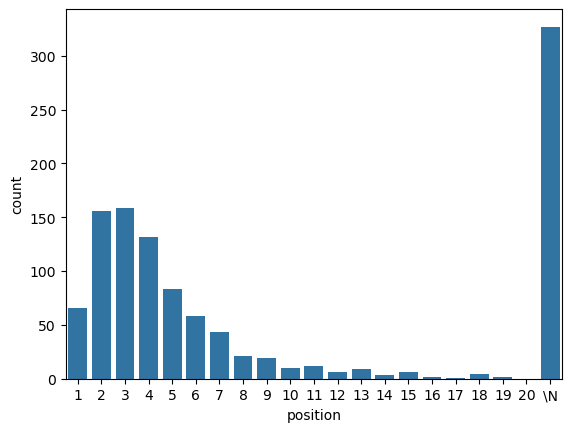

In [36]:
final_position_grid4 = results_df.loc[results_df['grid'] == 4]
sns.countplot(data=final_position_grid4, x='position', order=order)

<Axes: xlabel='position', ylabel='count'>

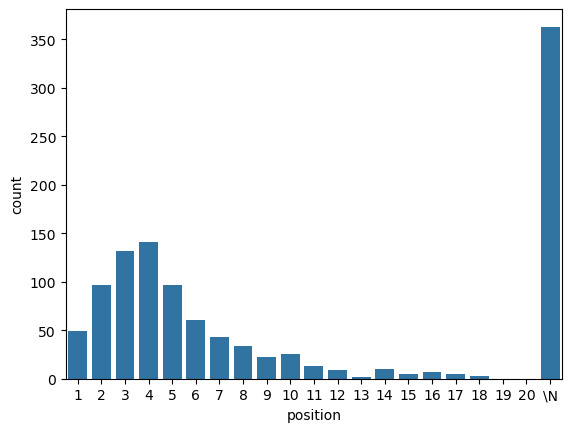

In [37]:
final_position_grid5 = results_df.loc[results_df['grid'] == 5]
sns.countplot(data=final_position_grid5, x='position', order=order)

### Impact of Starting Grid Position on First Lap Position

The following graph displays the distribution of starting grid positions for those who are in the first position after the first lap.

In [56]:
lap_times_df = pd.read_csv('F1Data/lap_times.csv')
grid_order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

<Axes: xlabel='grid', ylabel='count'>

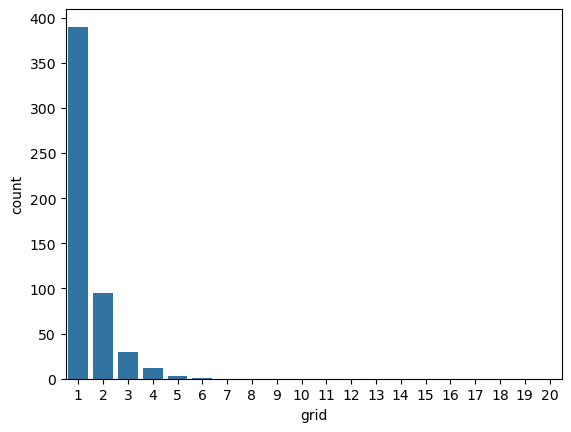

In [57]:
first_lap_position1 = lap_times_df.loc[(lap_times_df['lap'] == 1) & (lap_times_df['position'] == 1)]
first = pd.DataFrame(columns=results_df.columns)
for i,j in zip(first_lap_position1['raceId'], first_lap_position1['driverId']):
    first = pd.merge(first, results_df.loc[(results_df['raceId'] == i) & (results_df['driverId'] == j)], how='outer'
        )

sns.countplot(data=first, x='grid', order=grid_order)